In [80]:
# %matplotlib inline
%matplotlib notebook

In [81]:
import pandas as pd
import numpy as np
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt

In [82]:
# Read csv file
file = "cleaned_category_19848.csv"
original_df = pd.read_csv(file)
original_df

,Unnamed: 0,Name,Category,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County
0,0,Railroad Station Bar and Grill,"American(New),Southern",38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma
1,1,Hamburger Ranch & Bar-B-Que,"Barbeque,Burgers",38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma
2,2,Trading Post,"Bakeries,American(New)",38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma
3,3,Cloverdale Ale Company,American(Traditional),38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma
4,4,Piacere Italiano Steak and Seafood,"Italian,Steakhouses,Seafood",38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma
5,6,Papa's Pizza Cafe,"Pizza,Salad,Sandwiches",38.805326,-123.017612,4.5,85,$$,bwp-KNxkgfQhsbaBYYvqdw,Sonoma
6,7,MoE's Eagles Nest Deli,Delis,38.805669,-123.017421,3.5,61,$,mweczDf0CB-zt4JsremEPQ,Sonoma
7,8,La Hacienda,Mexican,38.806535,-123.017846,3.5,83,$$,aPow7ctyoPiaMGzHhzfZvQ,Sonoma
8,9,Picks Drive-In,"Burgers,IceCream&FrozenYogurt,Sandwiches",38.804752,-123.017062,3.5,167,$$,qqVysA8ns692wucr7ftr8w,Sonoma
9,10,El Molcajete,Mexican,38.784405,-123.014941,4.0,90,$$,vDVaUkNFw3__cspco8z6nw,Sonoma


In [83]:
# Create a group based on the values in the 'County' column
county_groupby = original_df.groupby('County')

# Count how many times each maker appears in our group
count_groupby_county = county_groupby['County'].count().to_frame()

count_groupby_county

,County
County,
Alameda,4575
Contra Costa,1880
Marin,545
Napa,289
SF,4860
San Mateo,1566
Santa Clara,4397
Solano,737
Sonoma,999


<IPython.core.display.Javascript object>


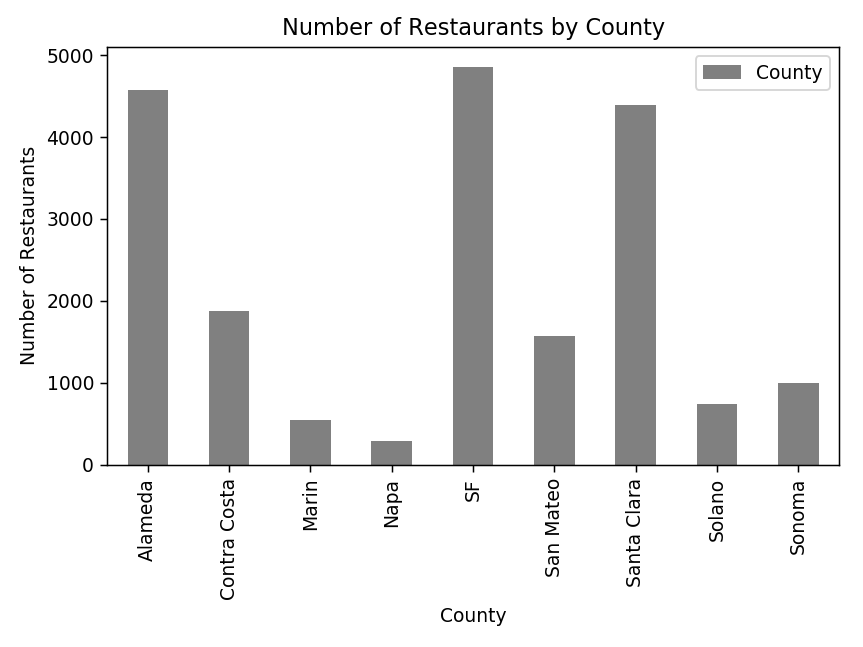

In [84]:
# Create a bar chart based off of the group series from before
# my_colors ='rgbkymc'
county_count_chart = count_groupby_county.plot(kind='bar', color = 'grey') 
plt.title("Number of Restaurants by County")
plt.ylabel("Number of Restaurants")
plt.xlabel("County")
plt.show();
plt.tight_layout()

In [22]:
plt.savefig('bar_ttl_rest_county.png')   # save the figure to file

In [85]:
# Create a group based on 'Rating' and 'County' column
ratings_groupby = original_df.groupby(['County', 'Rating'])

# Count how many times each maker appears in our group
ratings_groupby_county = ratings_groupby['Rating'].count().to_frame()

ratings_groupby_county

Rating
County       Rating        
Alameda      1.0         41
             1.5         97
             2.0        268
             2.5        333
             3.0        570
             3.5       1219
             4.0       1404
             4.5        529
             5.0        114
Contra Costa 1.0          7
             1.5         55
             2.0        126
             2.5        200
             3.0        276
             3.5        430
             4.0        548
             4.5        185
             5.0         53
Marin        1.0          5
             1.5          8
             2.0         21
             2.5         21
             3.0         69
             3.5        153
             4.0        177
             4.5         75
             5.0         16
Napa         1.0          3
             1.5          6
             2.0         20
...                     ...
San Mateo    4.0        480
             4.5        133
             5.0         35
Santa Clara  1.0         25
             1.5         56
             2.0        286
             2.5        403
             3.0        734
             3.5       1225
             4.0       1207
             4.5        366
             5.0         95
Solano       1.0          6
             1.5         34
             2.0         82
             2.5         92
             3.0        117
             3.5        152
             4.0        163
             4.5         76
             5.0         15
Sonoma       1.0         11
             1.5         21
             2.0         43
             2.5         77
             3.0        118
             3.5        196
             4.0        330
             4.5        174
             5.0         29

[81 rows x 1 columns]

In [86]:
# Remove ratings that lower than 3.5 
ratings_above3_5 = original_df.loc[(
    original_df["Rating"] >=3.5)]
ratings_above3_5.head()

,Unnamed: 0,Name,Category,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County
0,0,Railroad Station Bar and Grill,"American(New),Southern",38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma
1,1,Hamburger Ranch & Bar-B-Que,"Barbeque,Burgers",38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma
2,2,Trading Post,"Bakeries,American(New)",38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma
3,3,Cloverdale Ale Company,American(Traditional),38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma
4,4,Piacere Italiano Steak and Seafood,"Italian,Steakhouses,Seafood",38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma


In [87]:
# Create a group based on the values in the 'County' column
county = ratings_above3_5.groupby('County')

# Count how many times each maker appears in our group
ratings_county = county['County'].count()

ratings_county

County
Alameda         3266
Contra Costa    1216
Marin            421
Napa             206
SF              4384
San Mateo       1106
Santa Clara     2893
Solano           406
Sonoma           729
Name: County, dtype: int64

In [90]:
# Create a group based on 'Rating'  and 'County' column
county_ratings3_5 = ratings_above3_5.groupby(['County', 'Rating'])

# Count how many times each maker appears in our group
count = county_ratings3_5['Rating'].count().to_frame()

count

Rating
County       Rating        
Alameda      3.5       1219
             4.0       1404
             4.5        529
             5.0        114
Contra Costa 3.5        430
             4.0        548
             4.5        185
             5.0         53
Marin        3.5        153
             4.0        177
             4.5         75
             5.0         16
Napa         3.5         59
             4.0        104
             4.5         31
             5.0         12
SF           3.5        985
             4.0       2386
             4.5        896
             5.0        117
San Mateo    3.5        458
             4.0        480
             4.5        133
             5.0         35
Santa Clara  3.5       1225
             4.0       1207
             4.5        366
             5.0         95
Solano       3.5        152
             4.0        163
             4.5         76
             5.0         15
Sonoma       3.5        196
             4.0        330
             4.5        174
             5.0         29

In [57]:
 # Dependencies to find standard deviation
from math import sqrt

from statistics import mean


def variance(arr):
    _mean = mean(arr)
    normalized = [x - _mean for x in arr]
    squares = [x ** 2 for x in normalized]
    return sum(squares) / len(arr)


def standard_deviation(arr):
    return sqrt(variance(arr))


def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {standard_deviation(arr)}")

In [59]:
# Filter the data for SF county
sf_df = ratings_above3_5.loc[ratings_above3_5["County"] == "SF", :]
sf_sd = sf_df['Rating']
summarize("Ratings Standard Deviation", sf_sd)

Summarizing Ratings Standard Deviation
Variance: 0.1336795250604294
Standard Deviation: 0.3656221069087992


In [60]:
# Filter the data for Alameda county
alameda_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Alameda", :]
alameda_sd = alameda_df['Rating']
summarize("Ratings Standard Deviation", alameda_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16370534771771597
Standard Deviation: 0.4046051751000177


In [61]:
# Filter the data for Sanra Clara county
santa_clara_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Santa Clara", :]
santa_clara_sd = santa_clara_df['Rating']
summarize("Ratings Standard Deviation", santa_clara_sd)

Summarizing Ratings Standard Deviation
Variance: 0.15695603139466144
Standard Deviation: 0.39617676786336353


In [62]:
# Filter the data for Contra Costa county
contra_costa_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Contra Costa", :]
contra_costa_sd = contra_costa_df['Rating']
summarize("Ratings Standard Deviation", contra_costa_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16675802214984292
Standard Deviation: 0.408360162295299


In [63]:
san_mateo_df = ratings_above3_5.loc[ratings_above3_5["County"] == "San Mateo", :]
san_mateo_sd = san_mateo_df['Rating']
summarize("Ratings Standard Deviation", san_mateo_sd)

Summarizing Ratings Standard Deviation
Variance: 0.15194553626610188
Standard Deviation: 0.38980191926939234


In [64]:
sonoma_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Sonoma", :]
sonoma_sd = sonoma_df['Rating']
summarize("Ratings Standard Deviation", sonoma_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16605700350556282
Standard Deviation: 0.407500924545654


In [65]:
marin_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Marin", :]
marin_sd = marin_df['Rating']
summarize("Ratings Standard Deviation", marin_sd)

Summarizing Ratings Standard Deviation
Variance: 0.17041203784677386
Standard Deviation: 0.4128099294430475


In [66]:
solano_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Solano", :]
solano_sd = solano_df['Rating']
summarize("Ratings Standard Deviation", solano_sd)

Summarizing Ratings Standard Deviation
Variance: 0.174130651071368
Standard Deviation: 0.4172896488907531


In [67]:
napa_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Napa", :]
napa_sd = napa_df['Rating']
summarize("Ratings Standard Deviation", napa_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16738146856442626
Standard Deviation: 0.40912280376975596


In [68]:
stats.f_oneway(alameda_sd, contra_costa_sd, marin_sd, napa_sd, san_mateo_sd, santa_clara_sd, sf_sd, solano_sd, sonoma_sd)

F_onewayResult(statistic=34.58561792171495, pvalue=1.2889791251088012e-54)

In [73]:
# #Get the ratings data
box_whisker_ratings = original_df['Rating']

<IPython.core.display.Javascript object>


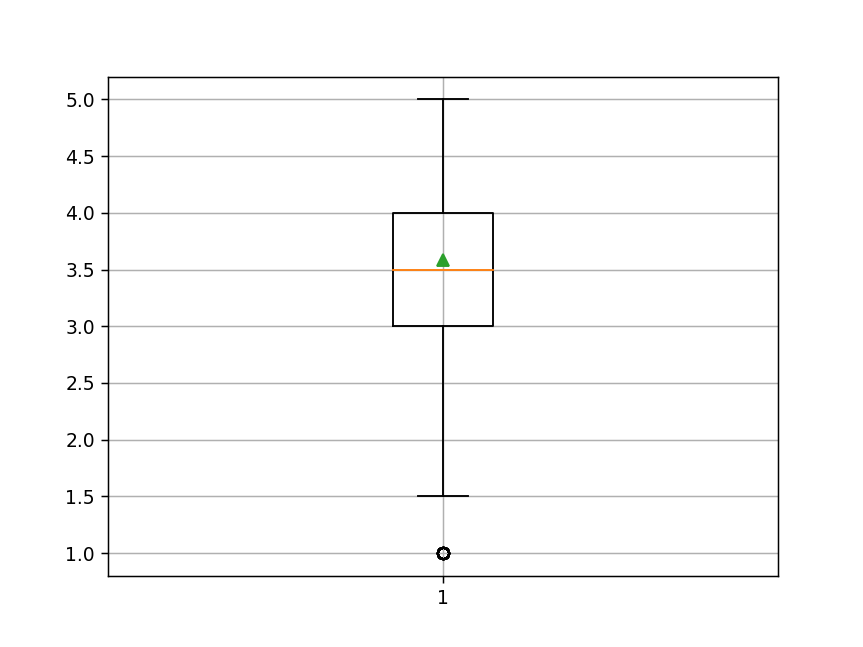

In [78]:
# Create box plot
plt.boxplot(box_whisker_ratings, showmeans=True)
plt.show()
plt.grid()

In [79]:
plt.savefig('box_whisker.png')   # save the figure to file